In [368]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

from sklearn.impute import SimpleImputer

from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns




In [369]:
df = pd.read_csv('C:/Suriya/Data Science Study Case/Stroke_Prediction.csv')

#Reading in the dataset

In [370]:
df.head()

,ID,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Stroke
0,31153,Male,1104.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30650,Male,21204.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,17412,Female,2928.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,57008,Female,25578.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46657,Male,5128.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [371]:
df.describe()

#Looking at general statistics for the dataframe



,ID,Age_In_Days,Hypertension,Heart_Disease,Avg_Glucose,BMI,Stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36875.482604,15446.234931,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.890037,8334.882942,0.291235,0.212733,43.111751,7.770020,0.133103
min,176.000000,-16381.000000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18594.250000,8789.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36908.000000,16074.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,55054.250000,21923.250000,0.000000,0.000000,112.070000,32.900000,0.000000
max,73899.000000,264301.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [372]:
percent_missing = df.isnull().sum() * 100 / len(df)
print(percent_missing)

#Seeing the percentage of missing data for each variable. We notice BMI and Smoking Status have missing data.
#3% missing data for BMI which is relatively low so mean imputation can be done. 
#30% missing data for Smoking_Status, somewhat high but still low enough to do imputation with most frequent value


ID                 0.000000
Gender             0.000000
Age_In_Days        0.000000
Hypertension       0.000000
Heart_Disease      0.000000
Ever_Married       0.000000
Type_Of_Work       0.000000
Residence          0.000000
Avg_Glucose        0.000000
BMI                3.368664
Smoking_Status    30.626728
Stroke             0.000000
dtype: float64


In [373]:
df['BMI'].fillna(df['BMI'].mean(), inplace = True)

#Mean imputation for BMI to fill in missing values

In [374]:
imp_mode = SimpleImputer(strategy = 'most_frequent')
df['Smoking_Status'] = imp_mode.fit_transform(df[['Smoking_Status']])
df.head()

#Imputation with most frequent values in the Smoking_Status column which happens to be the value "never smoked"

,ID,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Stroke
0,31153,Male,1104.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,30650,Male,21204.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,17412,Female,2928.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,57008,Female,25578.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46657,Male,5128.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0


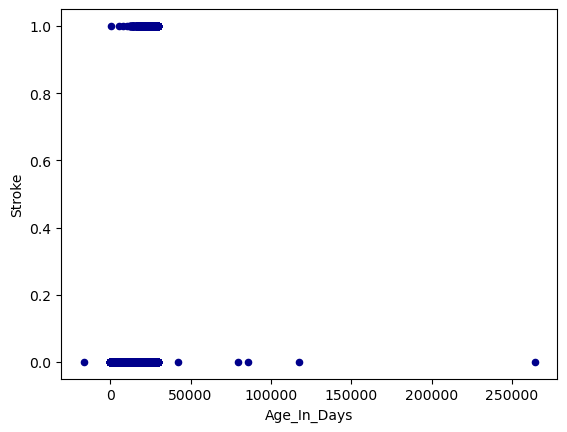

In [375]:
ax1 = df.plot.scatter(x='Age_In_Days',
                      y='Stroke',
                      c='DarkBlue')

#Looking at the relationship between age and stroke, it seems only people younger than 50000 days have had stroke. 
#All patients within 50000 days in age have had stroke or not had stroke. 
#Interesting to see patients older than 50000 days did not have stroke.

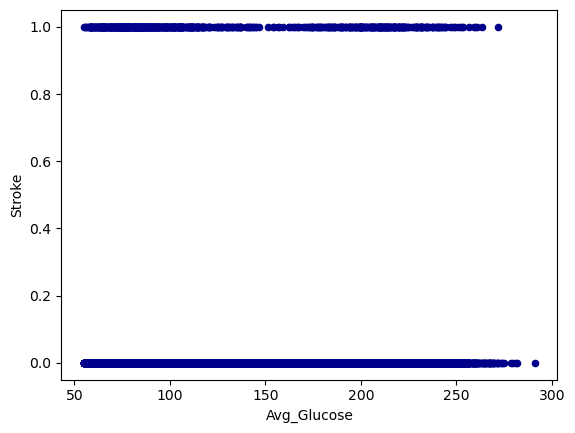

In [376]:
ax2 = df.plot.scatter(x='Avg_Glucose',
                      y='Stroke',
                      c='DarkBlue')

#Looks at varying levels of glucose, patients have had stroke

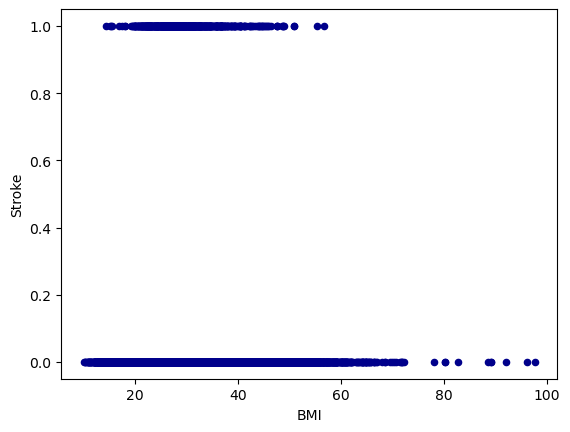

In [377]:
ax3 = df.plot.scatter(x='BMI',
                      y='Stroke',
                      c='DarkBlue')

#Plotting these two variables to see what relationship they may have
#We see a postive correlation between Glucose and BMI. As Glucose increases the BMI tends to increase

In [378]:
data = pd.get_dummies(df)

#We use get_dummies so we convert categorical variables to numerical binary variables having values of either 0 or 1
#Machine learning models will need numerical data so its best to convert everything to numerical form

In [379]:
data.head()


,ID,Age_In_Days,Hypertension,Heart_Disease,Avg_Glucose,BMI,Stroke,Gender_Female,Gender_Male,Gender_Other,...,Type_Of_Work_Govt_job,Type_Of_Work_Never_worked,Type_Of_Work_Private,Type_Of_Work_Self-employed,Type_Of_Work_children,Residence_Rural,Residence_Urban,Smoking_Status_formerly smoked,Smoking_Status_never smoked,Smoking_Status_smokes
0,31153,1104.0,0,0,95.12,18.0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
1,30650,21204.0,1,0,87.96,39.2,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
2,17412,2928.0,0,0,110.89,17.6,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
3,57008,25578.0,0,0,69.04,35.9,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
4,46657,5128.0,0,0,161.28,19.1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [380]:

data = data.astype(float)

data.head()

#Converting all variables to float so they are all the same type of variable


,ID,Age_In_Days,Hypertension,Heart_Disease,Avg_Glucose,BMI,Stroke,Gender_Female,Gender_Male,Gender_Other,...,Type_Of_Work_Govt_job,Type_Of_Work_Never_worked,Type_Of_Work_Private,Type_Of_Work_Self-employed,Type_Of_Work_children,Residence_Rural,Residence_Urban,Smoking_Status_formerly smoked,Smoking_Status_never smoked,Smoking_Status_smokes
0,31153.0,1104.0,0.0,0.0,95.12,18.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,30650.0,21204.0,1.0,0.0,87.96,39.2,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,17412.0,2928.0,0.0,0.0,110.89,17.6,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,57008.0,25578.0,0.0,0.0,69.04,35.9,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,46657.0,5128.0,0.0,0.0,161.28,19.1,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [381]:
percent_missing = data.isnull().sum() * 100 / len(data)
print(percent_missing)

#Checking again for missing values, after imputation we see that there are no missing values

ID                                0.0
Age_In_Days                       0.0
Hypertension                      0.0
Heart_Disease                     0.0
Avg_Glucose                       0.0
BMI                               0.0
Stroke                            0.0
Gender_Female                     0.0
Gender_Male                       0.0
Gender_Other                      0.0
Ever_Married_No                   0.0
Ever_Married_Yes                  0.0
Type_Of_Work_Govt_job             0.0
Type_Of_Work_Never_worked         0.0
Type_Of_Work_Private              0.0
Type_Of_Work_Self-employed        0.0
Type_Of_Work_children             0.0
Residence_Rural                   0.0
Residence_Urban                   0.0
Smoking_Status_formerly smoked    0.0
Smoking_Status_never smoked       0.0
Smoking_Status_smokes             0.0
dtype: float64


In [382]:
from sklearn.preprocessing import StandardScaler

object= StandardScaler()
scaled = data[['Age_In_Days','Avg_Glucose','BMI']]
scale = object.fit_transform(scaled)
#scale


data['Age_In_Days'] = scale[:,0]
data['Avg_Glucose'] = scale[:,1]
data['BMI'] = scale[:,2]


#Standardizing numerical data to make sure everything is on the same scale

<Axes: >

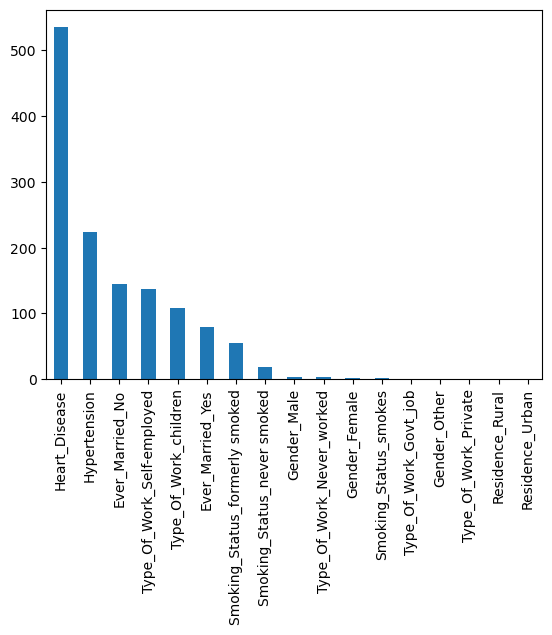

In [383]:
from sklearn.feature_selection import chi2
X = data.drop(columns=['Stroke','BMI','Avg_Glucose','Age_In_Days','ID'], axis=1)
Y = data['Stroke']

chi_scores = chi2(X, y)

chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()


#Doing Chi squared dist. to see which categorical variables have the most importance in terms of relationship to the dependent variable (Stroke)
#We can see from viz that variables after Gender_Male have very low importance so we can remove these predictors from the model

In [384]:
x = data.drop(columns = ['Stroke','Gender_Male','Type_Of_Work_Never_worked','Gender_Female',
                                'Smoking_Status_smokes','Type_Of_Work_Govt_job','Gender_Other','Type_Of_Work_Private',
                                'Residence_Rural','Residence_Urban','ID'], axis=1)

y = data['Stroke']



#We are defining x as all variables with high importance and including numerical variables. These are all the independent variables
#Y is dependent variable and is Stroke variable. Whether a patient is having stroke is what we are predicting.

#Also dropping ID column in X since ID variable does not go into predicting whether a patient has stroke.
#ID column is just there for identifying each patient so this variable doesn't go into ML model
#Dropped variables in x where they have low importance

In [385]:
x

,Age_In_Days,Hypertension,Heart_Disease,Avg_Glucose,BMI,Ever_Married_No,Ever_Married_Yes,Type_Of_Work_Self-employed,Type_Of_Work_children,Smoking_Status_formerly smoked,Smoking_Status_never smoked
0,-1.720768,0.0,0.0,-0.217176,-1.388469,1.0,0.0,0.0,1.0,0.0,1.0
1,0.690811,1.0,0.0,-0.383258,1.387150,0.0,1.0,0.0,0.0,0.0,1.0
2,-1.501926,0.0,0.0,0.148621,-1.440839,1.0,0.0,0.0,0.0,0.0,1.0
3,1.215600,0.0,0.0,-0.822123,0.955096,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.237972,0.0,0.0,1.317458,-1.244451,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
43395,-1.415061,0.0,0.0,-1.063359,-1.074248,1.0,0.0,0.0,1.0,0.0,1.0
43396,0.599867,0.0,0.0,2.531294,3.508142,0.0,1.0,0.0,0.0,1.0,0.0
43397,1.737749,1.0,0.0,-0.290939,0.038618,0.0,1.0,0.0,0.0,1.0,0.0
43398,-0.099731,0.0,0.0,-0.123465,0.601597,0.0,1.0,0.0,0.0,0.0,1.0


In [386]:
x_main, x_test, y_main, y_test = train_test_split(x,y,test_size=0.15,random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_main,y_main,test_size=0.15,random_state = 42)




#Since we are comparing multiple ML models we will have training, validation, and test sets.
#Training sets are used to train the ML models. Validation tests will be used to test the ML models accuracy
#From the accuracy of the models from the validation sets, we will pick the best model and then use that on the test set.
#Using a 70% training, 15% validation, 15% test.

In [387]:

model = LogisticRegression()
model.fit(x_train, y_train)
y_predict_log = model.predict(x_val)
model_score=model.score(x_val,y_val)


#Doing Logistic Regression which predicts a probability to an even occurring
#In this case the event is whether or not the patient will have a stroke
#We train the Logistic regression model on the training data and then test it on test data.



0.9837368991687748


<Axes: >

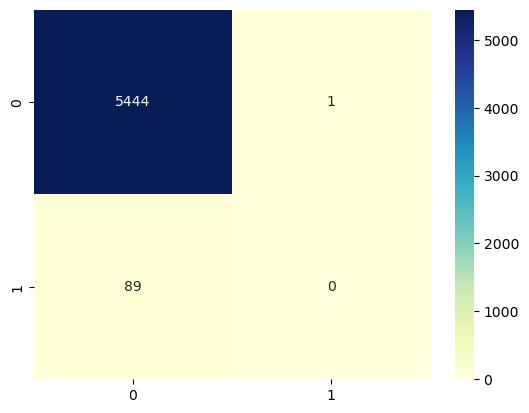

In [388]:
print(model_score)

cnf_matrix = metrics.confusion_matrix(y_val, y_predict_log)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

#We see from Logistic Regression model we get 98% accuracy score which is pretty high. 
#Has large amount of True Positives which is good as the model is predicting the patients having stroke correctly
#Has 235 False Negatives but this is relatively low number compared to the True Positives. 

0.9840983014094687
[[5445    0]
 [  88    1]]


<Axes: >

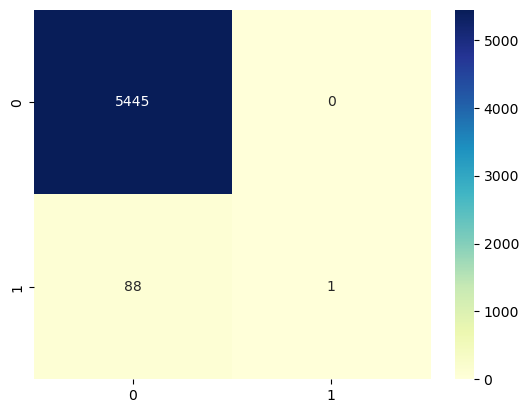

In [389]:
tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(x_train, y_train)
y_predict_tree = tree.predict(x_val)
model_score_tree=tree.score(x_val,y_val)
print(model_score_tree)
print(metrics.confusion_matrix(y_val, y_predict_tree))

cnf_matrix = metrics.confusion_matrix(y_val, y_predict_tree)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

#tried Decision Tree classifier with max_depth of 5 levels to the tree. 
#Only seeing one True negative in confusion matrix.


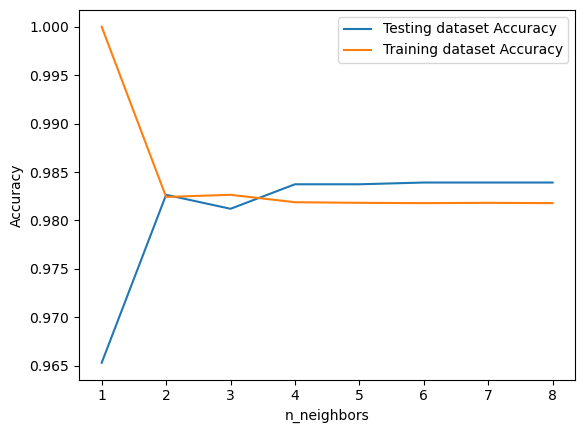

In [390]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Looping over K values and testing each one for KNN
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_val, y_val)
    
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [391]:
#Above we applied the KNN model. We varied the number of points for the neighbors from 1 to 9.
#We can see at k = 4, it has the highest accuracy. The accuracy doesn't change much for test data after k=4. 
#KNN tests for similarity within data points based on its neighboring points so k=4 seems to have the highest accuracy in terms of predicting stroke for patients



0.9837368991687748
[[5444    1]
 [  89    0]]


<Axes: >

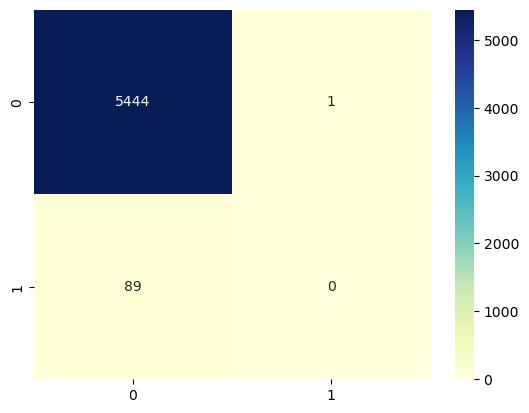

In [392]:
from sklearn.metrics import accuracy_score
knn4 = KNeighborsClassifier(n_neighbors = 4)
knn4.fit(x_train, y_train)
y_pred_4 = knn4.predict(x_val)

model_score_knn4=knn4.score(x_val,y_val)
print(model_score_knn4)


print(metrics.confusion_matrix(y_val, y_pred_4))

cnf_matrix = metrics.confusion_matrix(y_val, y_pred_4)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

#Looking at the Confusion matrix we have 5444 True Positive values so model is mostly predicting correctly.
#

In [393]:
#Looking at the accuracy above for K=4 for the KNN model we see that its slightly less than score for Decision Tree model.

Text(0, 0.5, 'Accuracy')

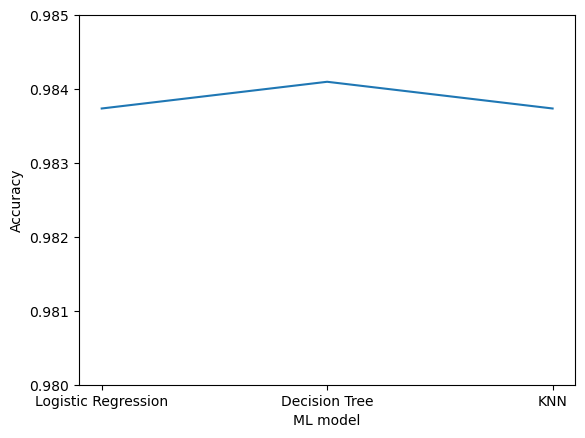

In [394]:
plt.plot(['Logistic Regression','Decision Tree','KNN'], [0.9837368991687748,0.9840983014094687,0.9837368991687748])
plt.ylim(.98,.985)
plt.xlabel('ML model')
plt.ylabel('Accuracy')

#Plotting the accuracy scores of the ML models we are testing
#Decision Tree had highest accuracy

0.9811059907834101
[[6387    0]
 [ 123    0]]


<Axes: >

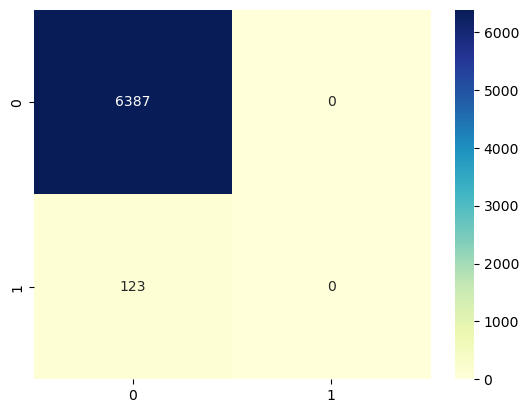

In [395]:
y_predict_tree = tree.predict(x_test)
model_score_treefinal=tree.score(x_test,y_test)
print(model_score_treefinal)
print(metrics.confusion_matrix(y_test, y_predict_tree))

cnf_matrix = metrics.confusion_matrix(y_test, y_predict_tree)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

#Applying Decision Tree model on the test data set. Got accuracy of 98.11%, slightly less than validation set which makes sense



In [396]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_logfinal))

#Seeing 98% accuracy on precision

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      6387
         1.0       0.00      0.00      0.00       123

    accuracy                           0.98      6510
   macro avg       0.49      0.50      0.50      6510
weighted avg       0.96      0.98      0.97      6510



C:\Users\saipa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saipa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saipa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
